In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from pylab import *
from io import StringIO


# Esperienza 1: Termometria e calorimetria
**Data**: 21 Ottobre 2019 
**Gruppo**: (V) Ivan , Antonio Gonzalez, Pietro


## Materiale

|Strumenti| Divisione| Portata |
|---------:|:-----------------|:-------------|
|2 Termometri a mercurio    |$0.2^\circ C$    | $100^\circ C$ |
|Bilancia | $0.1 g$ | -- |
|Calorimetri| -- | $1 l$ |
|Cronometro | $0.01 s$ | |

## 1.1 Costante di tempo del termometro

### Relazioni di base per il processo ideale
La relazione che lega la risposta del termometro al tempo è data dalla seguente formula:
$$T(t)=T_{f}+(T_{amb}-T_{f} )e ^{-\frac{t}{\tau}}$$
dove:
- $T(t)$ rappresenta la temperatura mostrata sul termometro all'istante di tempo $t$;
- $T_{amb}$ rappresenta la temperatura riportata sul termometro prima che questo venga inserito nel bagno di acqua cala, ovvero la temperatura al tempo $t=0$;
- $T_{f}$ rappresenta la temperatura dell'acqua calda;
- $\tau$ rappresenta la costante di tempo del termometro che vogliamo stimare; 

### Procedimento di misura
1. Nel primo calorimetro versiamo una quantità di acqua alla temperatura di $\sim 54^\circ C$, che rappresenta la nostra $T_{f}$; nel secondo una quantità di acqua a temperatura ambiente;
2. Immergiamo il termometro nel bagno di acqua a temperatura ambiente e aspettiamo che termalizzi con l'acqua stessa; a termalizzazione avvenuta registriamo la temperatura segnata dal termometro come $T_{amb}$
3. Immergiamo il termometro nel calorimetro con l'acqua calda e registriamo la temperatura segnta ad intervalli di tempo fissati ($0.5s$); 

Effettuiamo l'analisi dei dati servendoci di Python.
### Dati
 
`t`: tempo (s)  
`T`: temperatura ( $^\circ C$ )  
`DT`: risoluzione del termometro (distanza tra due tacche)  
`sT`: incertezza (deviazione standard) su T

Eseguiamo un fit sui dati raccolti attraversp la funzione curve_fit della libreria scipy. curve_fit riceve in ingresso una funzione che restituisce un esponenziale, un vettore contente gli istanti di tempo ad intervalli di $0.5s$ \(asse $x$\), un vettore contenente le temperature registrate \(asse $y$\), e un vettore con lo stesso numero di elementi dei vettori precedenti e contente l'incertezza associata a ogni misura di temperatura. Assumendo una distribuizione uniforme nell'intervallo delle divisioni stimiaimo tale incertezza come $\frac{DT}{\sqrt{12}}$. L'ultimo parametro di curve_fit viene dichiarato TRUE in modo da calcolare le incertezze assolute. 

#### Video 1, 1s

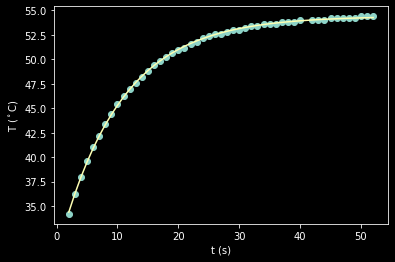

[10.15223516 54.40966347 24.39024659]


In [4]:
s = open("Datos12.txt").read().replace(",", ".")
t,T = transpose(loadtxt(StringIO(s)))
DT= 0.2
dS=DT/sqrt(12)*np.ones_like(T)
def fit_func(t, tau,TF ,DeltaT):
    return TF - DeltaT*exp(-t/tau)
params,pcov12 = curve_fit(fit_func, t, T,sigma=dS, absolute_sigma=True)
tau12, T0, DeltaT = params
plot(t, T, "o")
plot(t, fit_func(t, tau12, T0, DeltaT))
xlabel("t (s)")
ylabel("T ($^\circ$C)")
plt.show()
print(params)


In [5]:
print("tau = %.2f +/- %.2f s" % (tau12, sqrt(pcov12[0,0])))

tau = 10.15 +/- 0.04 s


#### Video 2, 1 s

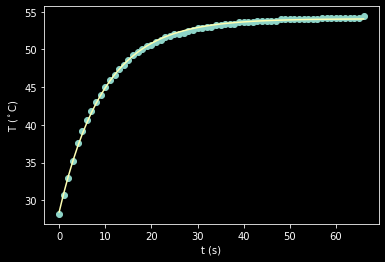

In [6]:
s = open("Datos22.txt").read().replace(",", ".")
t,T = transpose(loadtxt(StringIO(s)))
DT= 0.2
dS=DT/sqrt(12)*np.ones_like(T)
def fit_func(t, tau,TF ,DeltaT):
    return TF - DeltaT*exp(-t/tau)
params,pcov22 = curve_fit(fit_func, t, T,sigma=dS, absolute_sigma=True)
tau22, T0, DeltaT = params
plot(t, T, "o")
plot(t, fit_func(t, tau22, T0, DeltaT))
xlabel("t (s)")
ylabel("T ($^\circ$C)")
plt.show()

In [7]:
print("tau = %.2f +/- %.2f s" % (tau22, sqrt(pcov22[0,0])))

tau = 9.70 +/- 0.02 s


In [8]:

N2 = tau12/pcov12[0,0]+tau22/pcov22[0,0]
D2=1/pcov12[0,0]+1/pcov22[0,0]
P2=1/sqrt(D2)
print("tau = %.2f +/- %.2f s" % (N2/D2,P2 ))
#####Tau  videos a 1.0s######

tau = 9.83 +/- 0.02 s


### Calcolo attraverso la legge di raffreddamento di Newton
E' possibile calcolare analiticamente il valore di $\tau$ attraverso la legge di raffreddamento di Newton $$ \tau=\frac{C}{hA}$$ dove 
- C é la capacitá termica del mercurio, che possiamo calolare come attraverso il calore specifico e la massa, il primo noto, la seconda ricavata dalla relazione $v\rho = m$. Sapendo che $\rho = 1.3\cdot 10^4 Kg/m^3$ e, assumendo una forma cilindrica per il bulbo, dati l'altezza $ l = 11 mm $ e il diametro $d= 6 mm$ del bulbo, si ottiene che $$ C=cv\rho$$
- h é il coefficiente di convezione in acqua statica e vale $ 750 W/m^2K $;
- A é la superficie del bulbo

In [9]:
c = 140
h = 750
r = 0.003
l = 0.011
rho = 1.3e4

tau = c*r**2*np.pi*l*rho/(h*2*r*np.pi*l)
print("tau = %.1f s " % (tau))

tau = 3.6 s 


Confrontando i valori ottenuti dalle misure con il valore di $\tau$ calcolato analiticamente notiamo che questi valori sono decisamente poco consistenti. Alla luce di questa inconsistenza ipotiziamo che il termometro con il quale abbiamo effettuato le misure non sia un termometro a mercurio. 

## 1.2 Calcolo calore specifico

### Relazione di base
....

### Procedimento di misura
....

### Dati
....


In [47]:
Meq = 25. 
DMeq = 5.
Ma = np.array([202., 202.8, 200.7])
DMa = 0.1/np.sqrt(12)*np.ones_like(Ma)
ca = 1.
Ta = np.array([42.2, 40.8, 39.6])
DTa = 0.2/np.sqrt(12)*np.ones_like(Ta)
Te = np.array([40.8, 39., 38.2])
DTe = 0.2/np.sqrt(12)*np.ones_like(Te)
Mm = np.array([79., 73.1, 194.4])
DMm = 0.1/np.sqrt(12)*np.ones_like(Mm)
Tm = 28.2*np.ones_like(Ta)
DTm = 0.2/np.sqrt(12)*np.ones_like(Tm)

#### Calcolo

In [48]:
cm = (Meq + Ma)*ca*(Ta-Te)/(Mm*(Te-Tm))
Dcm_Meq = ca*(Ta - Te)/(Mm*(Te-Tm))
Dcm_Ma = ca*(Ta - Te)/(Mm*(Te-Tm))
Dcm_Ta = (Meq+Ma)*ca/(Mm*(Te-Tm))
Dcm_Te = (Meq + Ma)*ca/(Mm)*(Tm + Ta)/((Te- Tm)**2)
Dcm_Mm = - (Meq + Ma)*ca*(Ta-Te)/((Te-Tm)*Mm**2)
Dcm_Tm = (Meq + Ma)*ca*(Ta-Te)/(Mm*(Te - Tm)**2)
Dcm = np.sqrt(Dcm_Meq**2*DMeq**2 + Dcm_Ma**2*DMa**2 + Dcm_Ta**2*DTa**2 + Dcm_Te**2*DTe**2 + Dcm_Mm**2*DMm**2 + Dcm_Tm**2*DTm**2)
print("Calore specifico %.2f %.2f %.2f" %(cm[0], cm[1], cm[2]))

print("Incertezze %.2f %.2f %.2f" %(Dcm[0], Dcm[1], Dcm[2]))

Calore specifico 0.32 0.52 0.16
Incertezze 0.08 0.11 0.05


### Conclusioni
...

## 1.3 Calcolo del calore latente di fusione del ghiaccio
### Relazione di base
....

### Procedimento di misura
....

### Dati
....


In [58]:
Meq = 25 
Ma = 200.5
DMa = 0.1/np.sqrt(12)
Mg = 70.7
DMg = 0.1/np.sqrt(12)
Ta = 40.
DTa = 0.2/np.sqrt(12)
Teq= 13.2
DTeq = 0.2/np.sqrt(12)
Tf=0.

#### Calcolo

In [59]:
L = ((Meq+Ma)*ca*(Ta-Teq)-ca*Mg*(Teq-Tf))/Mg
DL_Meq = ca*(Ta-Teq)/Mg
DL_Ma = ca*(Ta-Teq)/Mg
DL_Ta = ca*(Meq+Ma)/Mg
DL_Teq = - ca*(Meq + Ma + Mg)/Mg
DL_Mg = -((Meq+Ma)*ca*(Ta-Teq))/Mg**2
DL = np.sqrt(DL_Meq**2*DMeq**2+DL_Ma**2*DMa**2+DL_Ta**2*DTa**2+DL_Teq**2*DTeq**2+DL_Mg**2*DMg**2)
print("Lambda = %.1f cal/g" %(L))
print("Incertezza = %.1f cal/g" %(DL))

Lambda = 72.3 cal/g
Incertezza = 1.9 cal/g


### Concluzione

.....

## 1.4 Verifica dell'equivalente in acqua del calorimetro
### Relazione di base
....

### Procedimento di misura
....

### Dati
....


In [87]:
Ma1 = 201.2
DMa1= 0.1/np.sqrt(12)
Ma2 = 31.2
DMa2= 0.1/np.sqrt(12)
Ta1 = 40.4
DTa1= 0.2/np.sqrt(12)
Ta2 = 23.6
DTa2= 0.2/np.sqrt(12)
Teq = 37.6
DTeq= 0.2/np.sqrt(12)

#### Calcoli 

In [90]:
Meq = Ma2*(Teq - Ta2)/(Ta1 - Teq) - Ma1
DM_Ma1 = -1
DM_Ma2 = (Teq - Ta2)/(Ta1 - Teq)
DM_Ta1 = -Ma2*(Teq - Ta2)/(Ta1 - Teq)**2
DM_Ta2 = -Ma2/(Ta1 - Teq)
DM_Teq =  Ma2/(Ta1 - Teq)
DM = np.sqrt(DM_Teq**2*DTeq**2+DM_Ma1**2*DMa1**2+DM_Ta1**2*DTa1**2+DM_Ta2**2*DTa2**2+DM_Ma2**2*DMa2**2)
print(Meq)
print(DM)

-45.19999999999982
3.346096314247056


In [ ]:
Meq = Ma2*(Teq - Ta2)/(Ta1 - Teq) - Ma1
DM_Ma1 = -1
DM_Ma2 = (Teq - Ta2)/(Ta1 - Teq)
DM_Ta1 = -Ma2*(Teq - Ta2)/(Ta1 - Teq)**2
DM_Ta2 = -Ma2/(Ta1 - Teq)
DM_Teq =  Ma2/(Ta1 - Teq)
DM = np.sqrt(DM_Teq**2*DTeq**2+DM_Ma1**2*DMa1**2+DM_Ta1**2*DTa1**2+DM_Ta2**2*DTa2**2+DM_Ma2**2*DMa2**2)
print(Meq)
print(DM)